In [1]:
#Import the packages
import pandas as mypd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as myplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math as mymath
import seaborn as mysb
from sklearn.ensemble import RandomForestRegressor
import random
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Import the dataset
mydata = mypd.read_excel('/Users/sudiptarakshit/Desktop/ISI MS QMS/Sem2/MDA/Assignment/Assignment8/CPU_Data.xlsx')

In [3]:
#Explore the dataset
mydata.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [4]:
#Check the dataset
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYCT    209 non-null    int64
 1   MMIN    209 non-null    int64
 2   MMAX    209 non-null    int64
 3   CACH    209 non-null    int64
 4   CHMIN   209 non-null    int64
 5   CHMAX   209 non-null    int64
 6   PRP     209 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB


In the dataset, we have all the continuous variables. We see that Features are MYCT, MMIN, MMAX, CACH, CHMIN, CHMAX Response variable is PRP

We see that there is no missing value in the dataset. Also there are total 209 observations in the dataset

In [5]:
#Separate x's and y
x = mydata.iloc[:,0:6]
y = mydata.iloc[:,6]

### Split the data randomly into training (80%) and test (20%)

We initialize the random number generator.

In [6]:
#Set seed
random.seed(100)

In [7]:
#Split the data into training (80%) and testing (20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [8]:
#Check the test/train split
x_train.count(), x_test.count()

(MYCT     167
 MMIN     167
 MMAX     167
 CACH     167
 CHMIN    167
 CHMAX    167
 dtype: int64,
 MYCT     42
 MMIN     42
 MMAX     42
 CACH     42
 CHMIN    42
 CHMAX    42
 dtype: int64)

train data has 167 observations & test data has 42 observations.

For easiness of computation we do MinMax transformation on the data.

In [9]:
#Scale the train data
scalar = MinMaxScaler()

In [10]:
#Fit and transform x_train data
x_train = scalar.fit_transform(X=x_train)

In [11]:
#Transform x_test data
x_test = scalar.transform(X=x_test)

| | **Operation on Train data** |  |
| :----: | :----: | :----: |
| | Build a General Model |  |
| |⇩| |
| |R<sup>2</sup> Accuracy Check | |
| |⇩| |
| |Cross Validation R<sup>2</sup> Check for generalizability | |
| |⇩ | |
| |Hyper Parameter Tuning| |
| |⇩ | |
| |Build model using the best parameters| |
| |⇩ | |
| |R<sup>2</sup> Accuracy Check | |
| |⇩ | |
| |Cross Validation R<sup>2</sup> Check for generalizability | |
| |⇩ | |
||Get predicted value on train data||
| |⇩ | |
|| MSE||
| |⇩ | |
||RMSE||


| | **Operation on Test data** |  |
| :----: | :----: | :----: |
||Get predicted value on Test data||
| |⇩| |
||R<sup>2</sup> accuracy on test data||
| |⇩ | |
||MSE||
| |⇩ | |
||RMSE||

## KNN Regressor

In [12]:
#Specify the model
mymodel = KNeighborsRegressor(n_neighbors=5)

In [13]:
#Fit the model to training data
mymodel = mymodel.fit(x_train,y_train)

In [14]:
#Model accuarcy
accuracy = mymodel.score(x_train,y_train)
round(accuracy,3)

0.822

In [15]:
#Cross Validation
myscore = cross_val_score(estimator=mymodel,X=x_train,y=y_train,cv=4,scoring='r2')

In [16]:
#Cross validation accuracy
myscore.mean()

0.7922176751200517

Accuracy is not very good with less model generalizability.

There may be an underfitting. We have to do hyper-parameter tuning for a more generalized model.

In [17]:
#Hyper parameter tuning
myparamgrid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [18]:
# Set up search
mysearch = GridSearchCV(estimator=mymodel,param_grid=myparamgrid,scoring='neg_mean_squared_error',cv=5,verbose=True)

In [19]:
#Fit the search on training data
mysearch = mysearch.fit(X=x_train,y=y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


In [20]:
# Optimum parameter values
mysearch.best_params_

{'n_neighbors': 3}

In [21]:
#Specify the optimum model
mymodel = KNeighborsRegressor(n_neighbors=3)

In [22]:
# Fit the model to training data
mymodel = mymodel.fit(X=x_train,y=y_train)

In [23]:
# Check the model accuracy: R square
rsq = mymodel.score(x_train,y_train)
rsq

0.8956890613836194

In [24]:
#Cross Validation
myscore = cross_val_score(estimator=mymodel,X=x_train,y=y_train,cv=4,scoring='r2')

In [25]:
#Cross validation accuracy
myscore.mean()

0.7955864171733852

There is improvement in model accuracy after hyper parameter optimization, Also, there is increase in model generalizability.

In [26]:
# Predicted Values
predy = mymodel.predict(X=x_train)

In [27]:
#Mean Square Error(MSE) on training data
mse = mean_squared_error(y_true=y_train,y_pred=predy)
mse

2446.8908848968726

In [28]:
# Root Mean Square Errorm(RMSE) on training data
rmse = mymath.sqrt(mse)
rmse

49.46605790738608

RMSE value is coming quite high though R<sup>2</sup> value is quite good.

This may be due to extreme values present in response variables. We draw box plot of the response variable PRP to validate the claim.


**PRP**

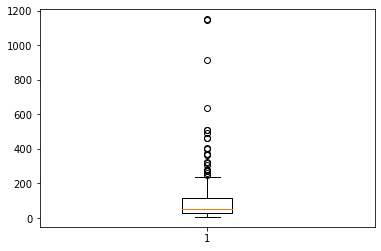

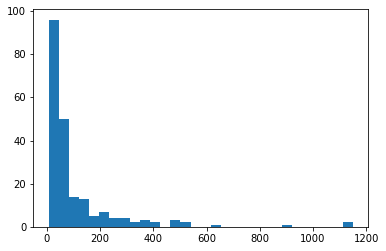

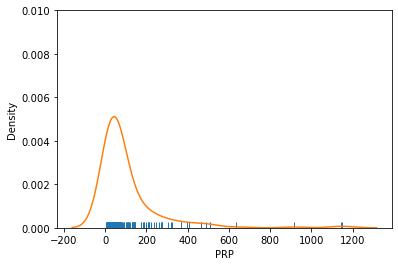

In [29]:
#Separate the PRP variable
PRP = mydata.PRP
#Box plot
myplot.boxplot(x=PRP)
myplot.show()
#Histogram
myplot.hist(x=PRP,bins=30)
myplot.show()
#Rug plot & KDE Plot
mysb.rugplot(x=PRP)
mysb.kdeplot(PRP)
myplot.ylim(0,0.01)
myplot.show()

So, though the overall model accuracy is good (95.08 %), we are getting high RMSE as some extreme values are present in the response variable.

## Applying the model on test data

In [30]:
#Validate the model on test data
predtest = mymodel.predict(X=x_test)

In [31]:
#Accuracy of the model on test data - generalizability
test_accuracy = mymodel.score(X=x_test,y=y_test)
test_accuracy

0.7328315052584464

There is a drop of R<sup>2</sup> value from 95.08% to 86.59%. It shows model generalizability is not good.

In [32]:
#Mean Square Error(MSE) on test data
mse_test = mean_squared_error(y_true=y_test,y_pred=predtest)
mse_test

9304.238095238094

In [33]:
# Root Mean Square Errorm(RMSE) on test data
rmse_test = mymath.sqrt(mse_test)
rmse_test

96.45847860731628

We see that RMSE has increased on test data from 96.45 to 49.46. It shows model generalizability is not good.

| |K Nearest Neighbour | |
| :-----------: | :-----------: |:-----------: |
| | Train Data |Test Data |
| R-sq |89.56|73.28|
|MSE |2446.89 |9304.23|
|RMSE |49.46|96.45|


## SVM Regressor

In [53]:
#Specify the model
mymodel = svm.SVR()

In [54]:
#Fit the model to the data
mymodel = mymodel.fit(X=x_train,y=y_train)

In [55]:
#Model accuarcy
rsq = mymodel.score(x_train,y_train)
rsq

-0.008077933108057156

In [56]:
#Cross validation
myscore = cross_val_score(estimator=mymodel,X=x_train,y=y_train,cv=4,scoring='r2')

In [57]:
#Cross Validation accuracy
myscore.mean()

-0.02753841494864276

**Hyper Parameter Tuning**

In [42]:
#Specify the parameter grid
myparamgrid = {'kernel':['linear', 'poly', 'rbf'],'C':[0.001, 0.01, 0.1, 1, 5, 10, 100],'degree':[1,2,3]}

In [43]:
#Specify the search
mysearch = GridSearchCV(estimator=mymodel,param_grid=myparamgrid,scoring='neg_mean_squared_error',cv=4,verbose=1)

In [44]:
#Fit the search to the data
mysearch = mysearch.fit(X=x_train,y=y_train)

Fitting 4 folds for each of 63 candidates, totalling 252 fits


In [45]:
#optimum parameters of SVM model
mysearch.best_params_

{'C': 1, 'degree': 2, 'kernel': 'poly'}

In [59]:
# Specify the optimum model
mymodel = svm.SVR(kernel='poly',degree=2,C=1)

In [60]:
# Fit the model to training data
mymodel = mymodel.fit(X=x_train,y=y_train)

In [61]:
# Check the model accuracy: R square
rsq = mymodel.score(x_train,y_train)
rsq

0.9011462639120907

There is huge improvement in model accuracy after hyper parameter tuning.

In [62]:
#Cross validation
myscore = cross_val_score(estimator=mymodel,X=x_train,y=y_train,scoring='r2',cv=4)

In [63]:
#Cross validation accuracy
myscore.mean()

0.8635779051228848

Also, we notice that model generalizability has improved after cross validation.

In [64]:
# Predicted Values
predy = mymodel.predict(X=x_train)

In [65]:
#Mean Square Error(MSE) on training data
mse = mean_squared_error(y_true=y_train,y_pred=predy)
mse

2318.8776649884485

In [66]:
# Root Mean Square Errorm(RMSE) on training data
rmse = mymath.sqrt(mse)
rmse

48.154726299590244

## Apply the model on test data

In [68]:
#Accuracy for test data
rsq_test = mymodel.score(X=x_test,y=y_test)
rsq_test

0.8168144096732399

Model accuracy has reduced from 95.25% to 84.28% on test data.

In [70]:
#Predict for test data
predtest = mymodel.predict(x_test)

In [71]:
#Test MSE
msetest = mean_squared_error(y_true=y_test,y_pred=predtest)
print(msetest)
#Test RMSE
rmsetest = mymath.sqrt(msetest)
print(rmsetest)

6379.50350270783
79.87179416231884


There is a very significant increase in RMSE value on test data as compared to train data.

| |Support Vector Regressor | |
| ----------- | ----------- |----------- |
| | Train Data |Test Data |
| R-sq |90.11|81.68|
|MSE |2318.87 |6379.50|
|RMSE |48.154 |79.87|


## Compare the Two models

| |K Nearest Neighbour | |Support Vector Regressor | |
| :-----------: | :-----------: |:-----------: |:-----------: |:-----------: |
| | Train Data |Test Data |Train Data |Test Data |
| R-sq |89.56|73.28|90.11|81.68|
|MSE |2446.89 |9304.23|2318.87 |6379.50|
|RMSE |49.46|96.45|48.154|79.87|


We find that Support vector regressor is better model in terms of accuracy.

## Compare all the models

| |Bagging Model |  |Random Forest| |CART| |Linear Regression| |KNN Regressor| |Support Vector Regressor|  |
| :-----------: | :-----------: |:-----------: | :-----------: |:-----------:|:-----------: |:-----------: |:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
| | Train Data |Test Data |Train Data |Test Data |Train Data |Test Data |Train Data |Test Data |Train Data |Test Data |Train Data |Test Data |
| R<sup>2</sup> |95.08|86.59|95.26|82.19|95.40|82.90|90.5|71.56|89.56|73.28|90.11|81.68|
|MSE |1152.79 |4669.69|1109.94|6200.91	|1076.93	|5956.08|2234.47|9903.62|2446.89|9304.23|2318.87|6379.50|
|RMSE |33.95 |68.335|33.31 |78.75|32.87	|77.17|47.27|99.51|49.46|96.45|48.154|79.87|

We compare all the models and find out that tree based models have higher accuracy and model generalizability. KNN regressor model has lowest accuracy and model generalizability. 